<a href="https://colab.research.google.com/github/SiriBatchu/CMPE-255-HW3/blob/main/TimeSeriesForecasting_Univariate_Without_Exogenous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
os.environ["PYCARET_CUSTOM_LOGGING_LEVEL"] = "CRITICAL"

In [5]:
def what_is_installed():
  from pycaret import show_versions
  show_versions()
try:
  what_is_installed()
except ModuleNotFoundError:
    !pip install pycaret
    what_is_installed()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 941.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━

In [6]:
import time
import pandas as pd
import numpy as np

from pycaret.datasets import get_data
from pycaret.time_series import TSForecastingExperiment

In [7]:
from pycaret.datasets import get_data
data=get_data('pycaret_downloads', verbose=False)

In [8]:
print(data.head())
print(data.columns)


        Date  Total
0   7/8/2021   3773
1   7/9/2021   3172
2  7/10/2021   2079
3  7/11/2021   2725
4  7/12/2021   4542
Index(['Date', 'Total'], dtype='object')


<Axes: >

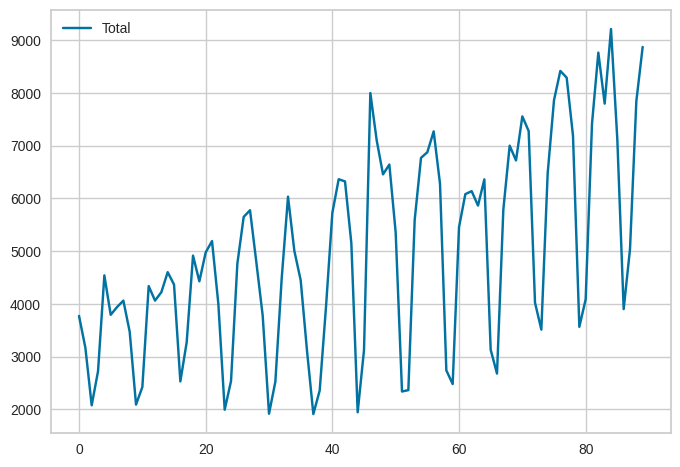

In [9]:
data.plot()

In [10]:
import pandas as pd

data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data.set_index('Date', inplace=True)

In [12]:
print(data.head())


            Total
Date             
2021-07-08   3773
2021-07-09   3172
2021-07-10   2079
2021-07-11   2725
2021-07-12   4542


<Axes: xlabel='Date'>

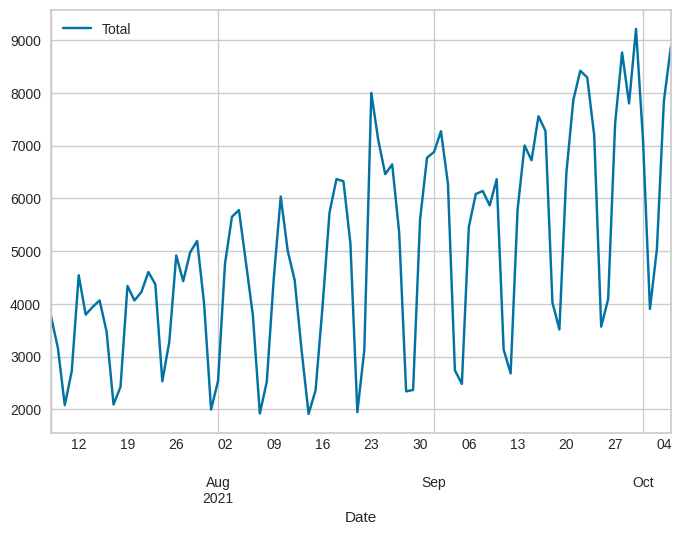

In [13]:
data.plot()

In [14]:
from pycaret.time_series import *

In [15]:
fh =12
fold = 3
fig_kwargs = {
    "renderer": "png",
    "width": 500,
    "height": 500
}


In [16]:
#plot original dataset
eda = TSForecastingExperiment()
eda.setup(data, fh=fh, fold=fold, fig_kwargs=fig_kwargs)


,Description,Value
0,session_id,4192
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(78, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


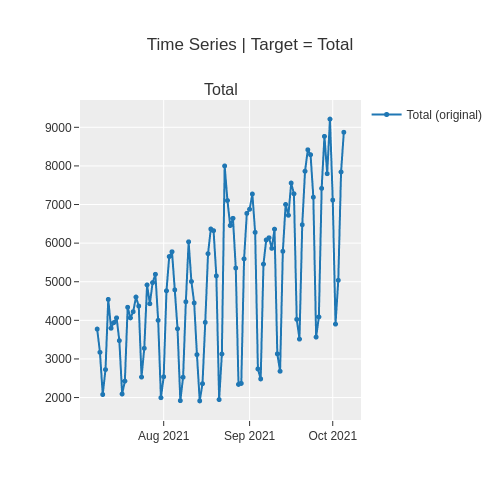

In [17]:
eda.plot_model()

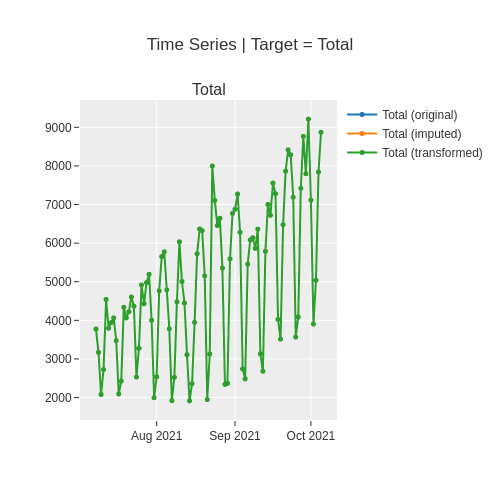

In [18]:
eda.plot_model(data_kwargs={"plot_data_type": ["original", "imputed", "transformed"]})



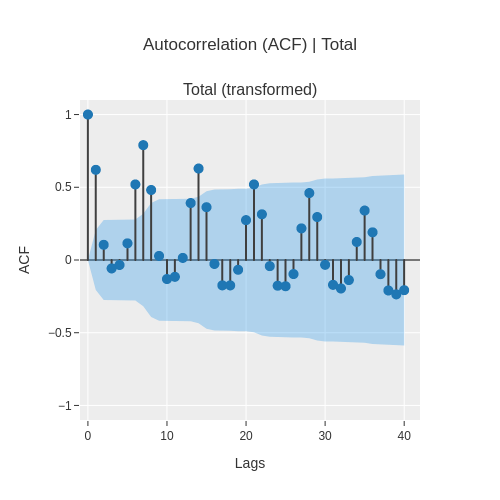

In [19]:
fig_kwargs = {
    "renderer": "png",
    "width": 800,
    "height": 800
}
#ACF and PACF
eda.plot_model(plot="acf")



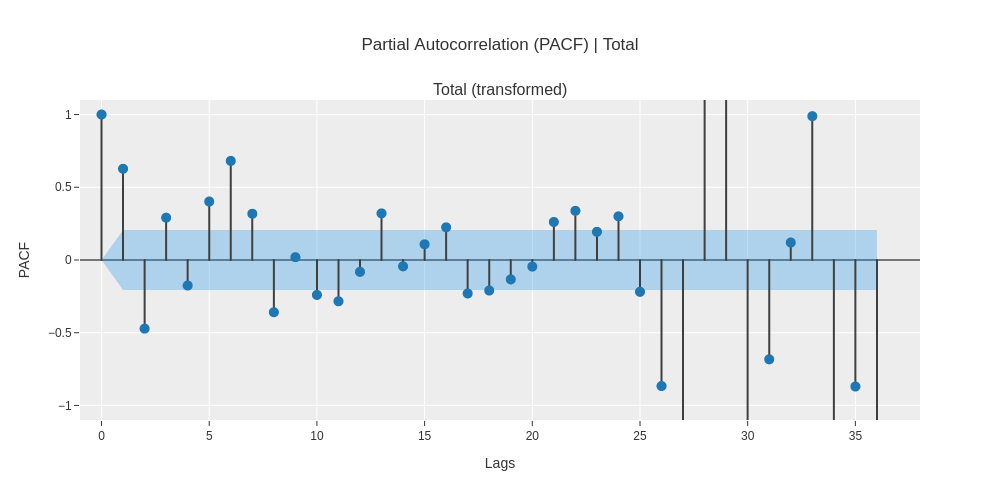

In [20]:
eda.plot_model(plot="pacf", data_kwargs={'nlags':36}, fig_kwargs={'height':500, 'width':1000})



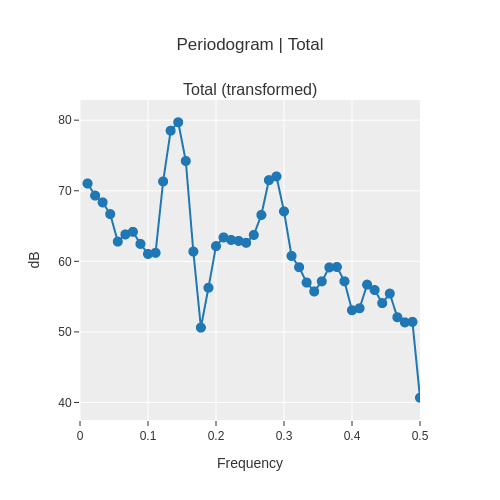

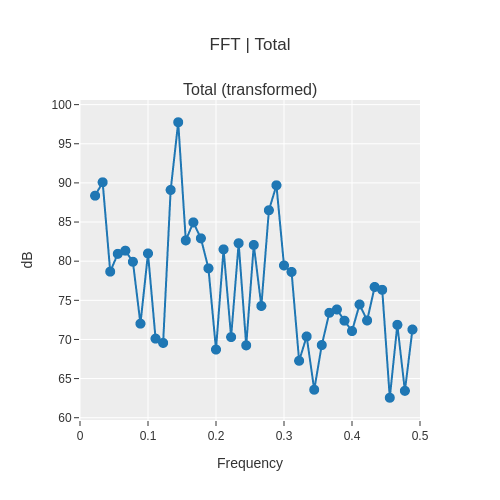

In [21]:
eda.plot_model(plot="periodogram")
eda.plot_model(plot="fft")



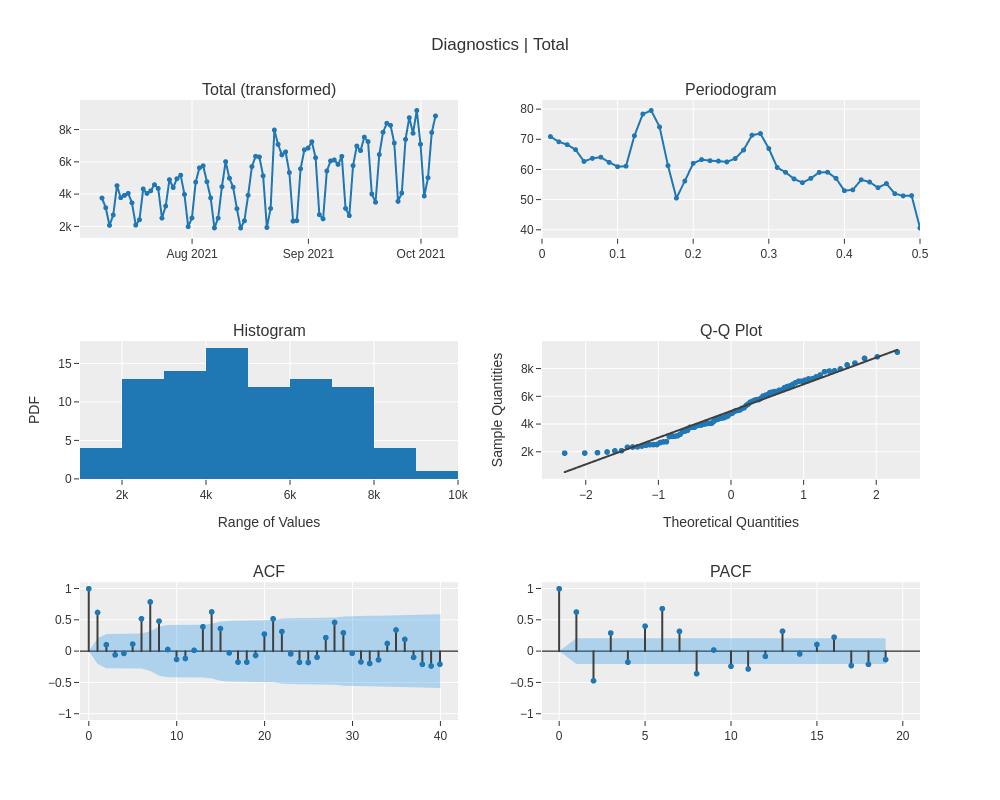

In [22]:
eda.plot_model(plot="diagnostics", fig_kwargs={'height':800, 'width':1000})


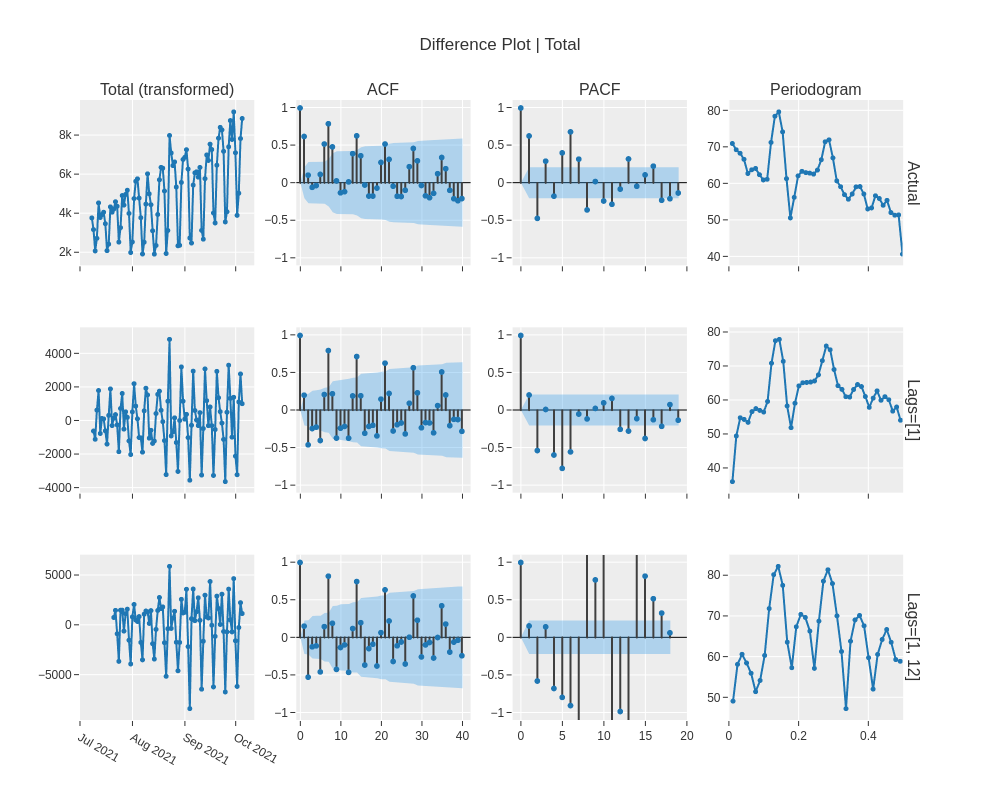

In [23]:
eda.plot_model(
    plot="diff",
    data_kwargs={'lags_list': [[1],[1,12]], "acf": True, "pacf": True, "periodogram": True}, fig_kwargs={'height':800, 'width':1000})


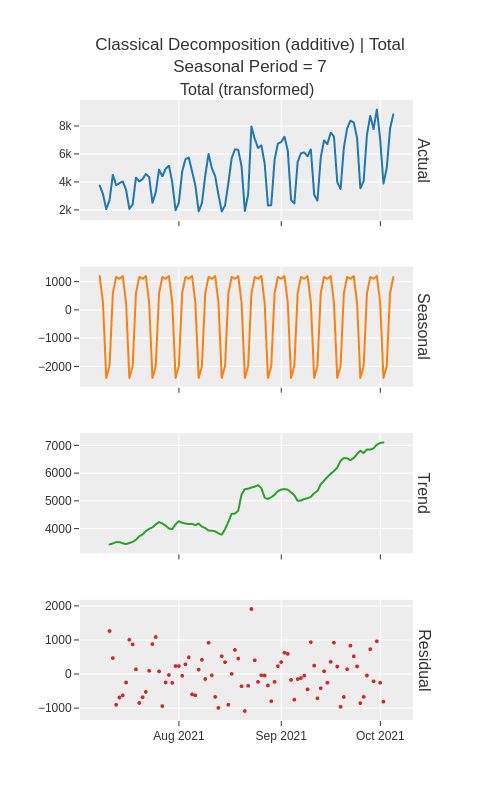

In [24]:
#Time Series Decomposition
eda.plot_model(plot="decomp", fig_kwargs={'height': 800})


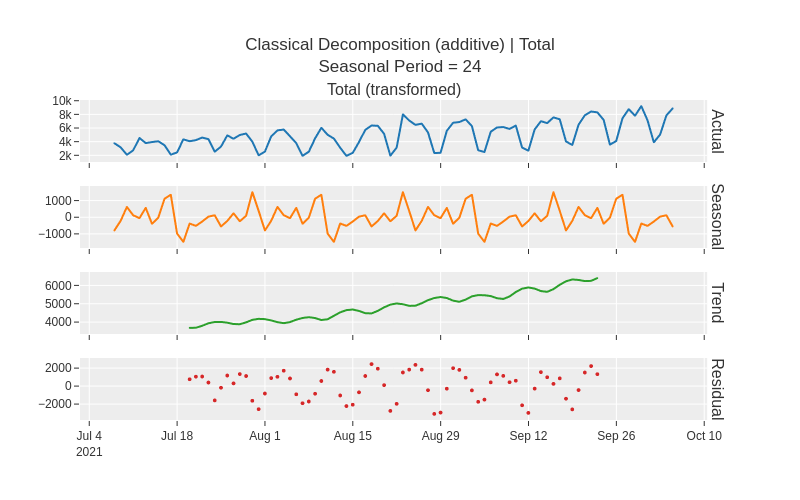

In [25]:
#Seasonal Period
eda.plot_model(plot="decomp", data_kwargs={'seasonal_period':24}, fig_kwargs={'height': 500, 'width': 800})


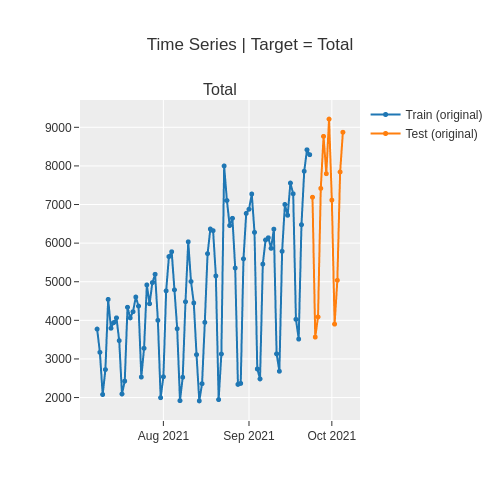

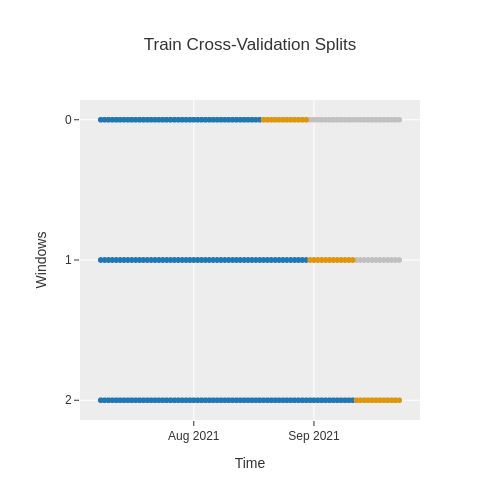

In [26]:
#Splits of data for modeling
eda.plot_model(plot="train_test_split")
eda.plot_model(plot="cv")


In [27]:
#Statistical Tests
eda.check_stats(test="summary")


,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,9.000000e+01
1,Summary,Statistics,Transformed,# Missing Values,,0.000000e+00
2,Summary,Statistics,Transformed,Mean,,4.960367e+03
3,Summary,Statistics,Transformed,Median,,4.776500e+03
4,Summary,Statistics,Transformed,Standard Deviation,,1.939000e+03
5,Summary,Statistics,Transformed,Variance,,3.759721e+06
6,Summary,Statistics,Transformed,Kurtosis,,-9.201133e-01
7,Summary,Statistics,Transformed,Skewness,,2.262201e-01
8,Summary,Statistics,Transformed,# Distinct Values,,8.900000e+01


In [28]:
eda.check_stats(test="stationarity")

eda.check_stats(test="white_noise")

eda.check_stats(test="kpss", alpha = 0.2)


,Test,Test Name,Data,Property,Setting,Value
0,Stationarity,KPSS,Transformed,Trend Stationarity,{'alpha': 0.2},False
1,Stationarity,KPSS,Transformed,p-value,{'alpha': 0.2},0.1
2,Stationarity,KPSS,Transformed,Test Statistic,{'alpha': 0.2},0.032908
3,Stationarity,KPSS,Transformed,Critical Value 10%,{'alpha': 0.2},0.119
4,Stationarity,KPSS,Transformed,Critical Value 5%,{'alpha': 0.2},0.146
5,Stationarity,KPSS,Transformed,Critical Value 2.5%,{'alpha': 0.2},0.176
6,Stationarity,KPSS,Transformed,Critical Value 1%,{'alpha': 0.2},0.216


In [29]:
eda.check_stats()


,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,90.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,4960.366667
3,Summary,Statistics,Transformed,Median,,4776.5
4,Summary,Statistics,Transformed,Standard Deviation,,1939.000116
5,Summary,Statistics,Transformed,Variance,,3759721.448315
6,Summary,Statistics,Transformed,Kurtosis,,-0.920113
7,Summary,Statistics,Transformed,Skewness,,0.22622
8,Summary,Statistics,Transformed,# Distinct Values,,89.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",293.08932


In [30]:

eda.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
ets,ETS,sktime.forecasting.ets.AutoETS,True
theta,Theta Forecaster,sktime.forecasting.theta.ThetaForecaster,True


In [31]:
exp = TSForecastingExperiment()
exp.setup(data=data, fh=fh, fold=fold, fig_kwargs=fig_kwargs, session_id=42)


,Description,Value
0,session_id,42
1,Target,Total
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(90, 1)"
5,Transformed data shape,"(90, 1)"
6,Transformed train set shape,"(78, 1)"
7,Transformed test set shape,"(12, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [32]:
#ARIMA Model
model = exp.create_model('arima', order=(1,1,0), seasonal_order=(0,1,0,12))


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,6.0146,6.7562,2752.2730,3757.5263,0.9626,0.4798,-2.5815
1,2021-08-30,4.3236,3.4450,2790.6785,3335.8941,0.6282,0.6147,-3.2830
2,2021-09-11,8.5549,6.6740,5307.2349,6079.5533,0.7774,1.2277,-9.9745
Mean,NaT,6.2977,5.6251,3616.7288,4390.9912,0.7894,0.7741,-5.2797
SD,NaT,1.7390,1.5419,1195.4712,1206.3374,0.1368,0.3255,3.3321


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [33]:
#Out of Sample Forecasts
data_predict = exp.predict_model(model)
data_predict

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ARIMA,8.7697,6.9886,5798.8853,6430.6975,1.0744,0.6143,-9.8019


,y_pred
2021-09-24,8425.5364
2021-09-25,11691.4645
2021-09-26,12990.7026
2021-09-27,12784.5840
2021-09-28,13691.3649
2021-09-29,13484.7886
2021-09-30,10304.1517
2021-10-01,9863.5045
2021-10-02,12896.8555
2021-10-03,14355.2063


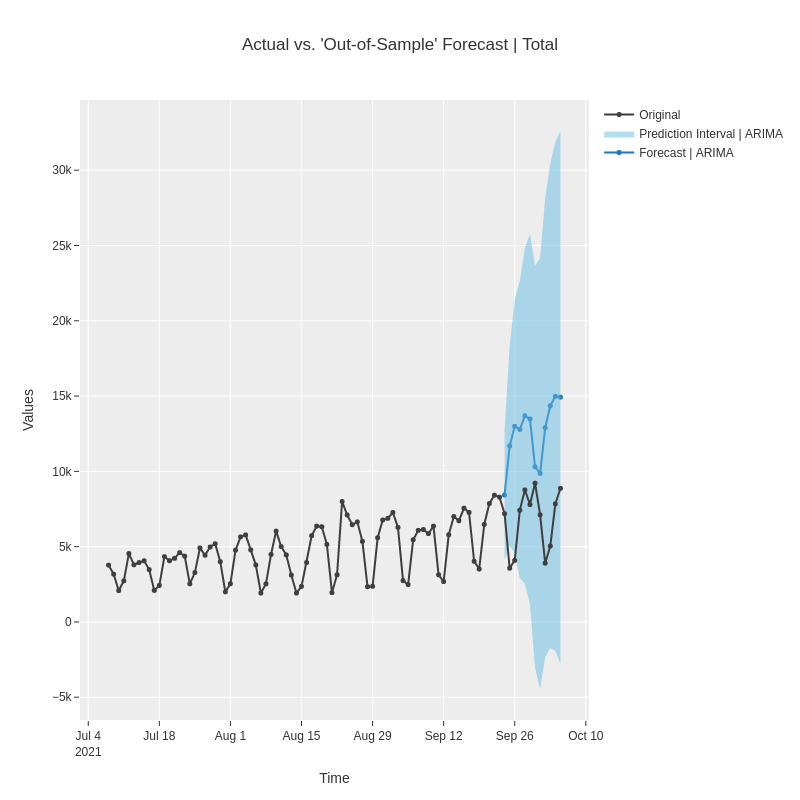

In [34]:
exp.plot_model(estimator=model)

In [35]:
#Check Goodness of Fit
exp.check_stats(model)


,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Residual,Length,,77.0
1,Summary,Statistics,Residual,# Missing Values,,0.0
2,Summary,Statistics,Residual,Mean,,-40.460022
3,Summary,Statistics,Residual,Median,,445.7665
4,Summary,Statistics,Residual,Standard Deviation,,2482.370632
5,Summary,Statistics,Residual,Variance,,6162163.956491
6,Summary,Statistics,Residual,Kurtosis,,1.31615
7,Summary,Statistics,Residual,Skewness,,-0.835067
8,Summary,Statistics,Residual,# Distinct Values,,77.0
9,White Noise,Ljung-Box,Residual,Test Statictic,"{'alpha': 0.05, 'K': 24}",251.044687


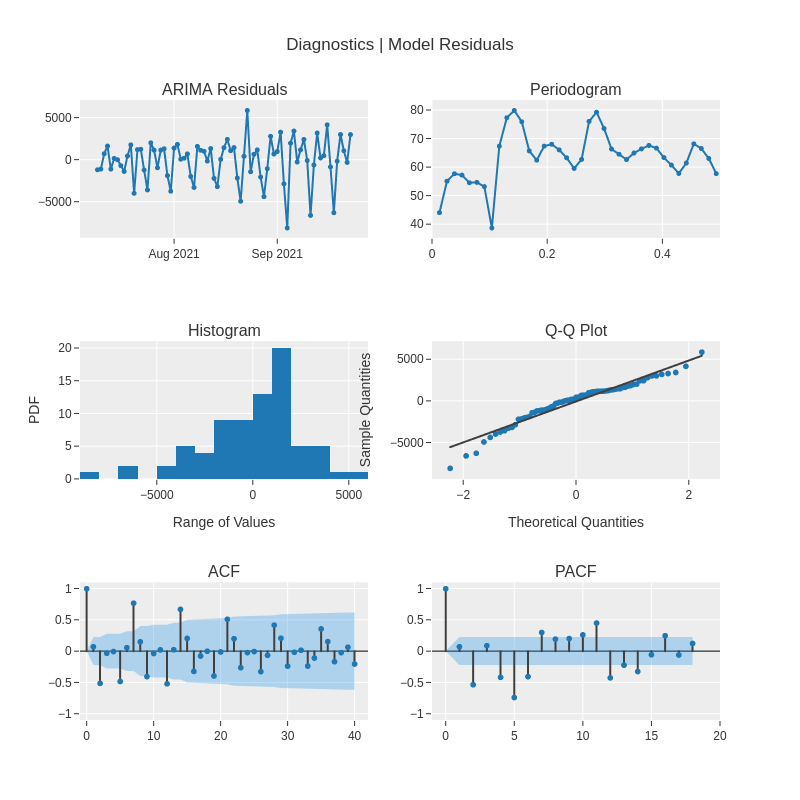

In [36]:
exp.plot_model(model, plot="diagnostics")


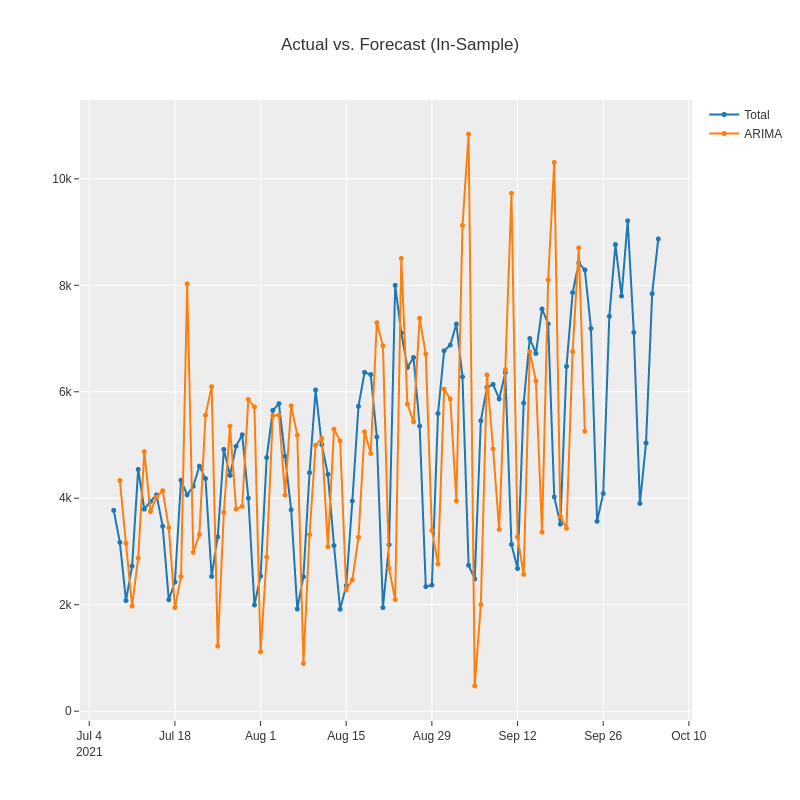

In [37]:
#Insample plot to show model fit to actual data
exp.plot_model(model, plot="insample")



,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,2.2716,2.2753,1039.4762,1265.4479,0.2052,0.2130,0.5938
1,2021-08-30,1.0014,0.7457,646.3328,722.0824,0.1304,0.1247,0.7993
2,2021-09-11,1.1310,0.9019,701.6403,821.5706,0.1236,0.1235,0.7996
Mean,NaT,1.4680,1.3076,795.8164,936.3670,0.1531,0.1538,0.7309
SD,NaT,0.5707,0.6872,173.7667,236.2134,0.0370,0.0419,0.0969


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,LGBMRegressor,0.6727,0.6373,444.8467,586.4060,0.0640,0.0653,0.9102


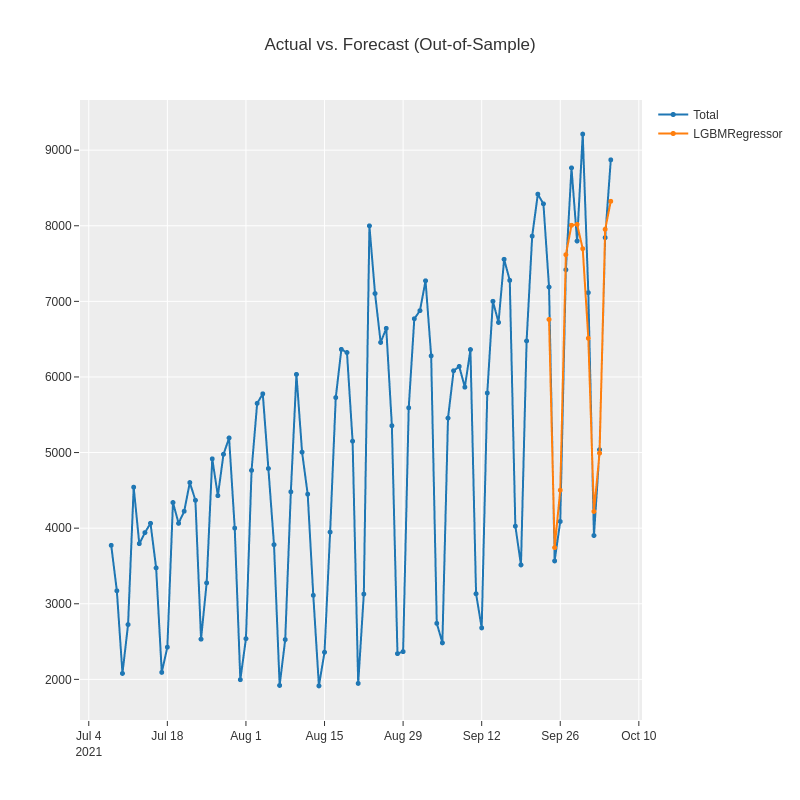

In [38]:
#Reduced Regressors:LightGBM
model = exp.create_model('lightgbm_cds_dt')
data_predict = exp.predict_model(model)
data_predict
exp.plot_model(estimator=model)


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,2.1468,2.2472,982.3659,1249.7899,0.1757,0.1913,0.6038
1,2021-08-30,0.9769,0.7620,630.5256,737.8764,0.1283,0.1225,0.7904
2,2021-09-11,1.2204,0.9735,757.0735,886.7752,0.1308,0.1313,0.7665
Mean,NaT,1.4480,1.3276,789.9883,958.1472,0.1449,0.1483,0.7202
SD,NaT,0.5040,0.6560,145.5116,214.9951,0.0218,0.0306,0.0829


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   25.5s finished


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging

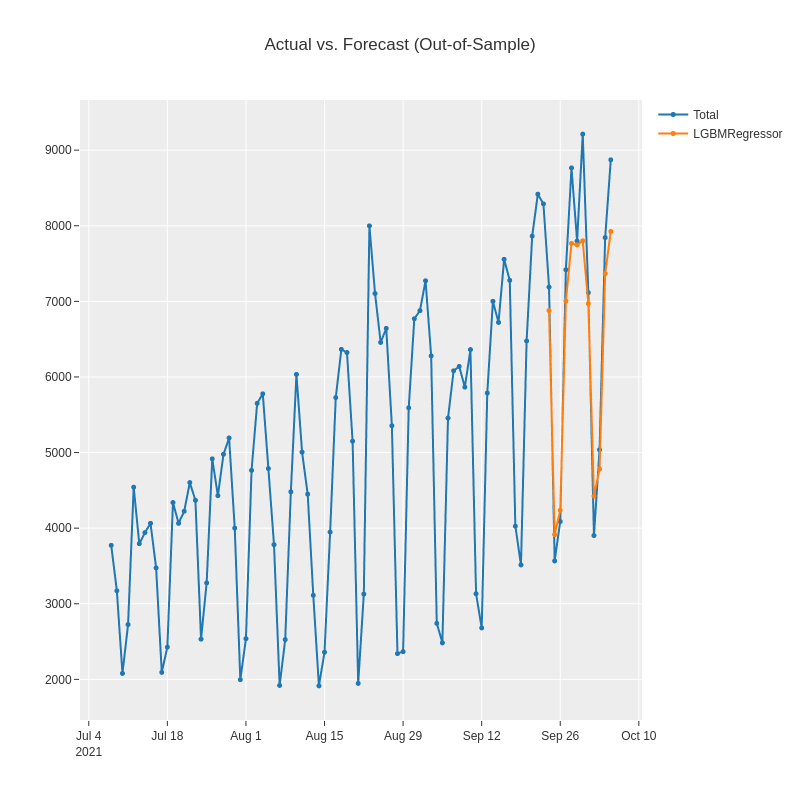

In [39]:
#Random Grid Search
tuned_model = exp.tune_model(model)
exp.plot_model(estimator=tuned_model)

In [40]:
print(model)
print(tuned_model)


BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                        4, 3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(n_jobs=-1, random_state=42), sp=7,
                    window_length=7)
BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                        4, 3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(bagging_freq=4, colsample_bytree=0.5,
              learning_rate=0.011608086832988466, max_depth=1,
              min_child_samples=5, n_estimators=227, n_jobs=-1, num_leaves=248,
              random_state=42, reg_alpha=0.030243982597

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging

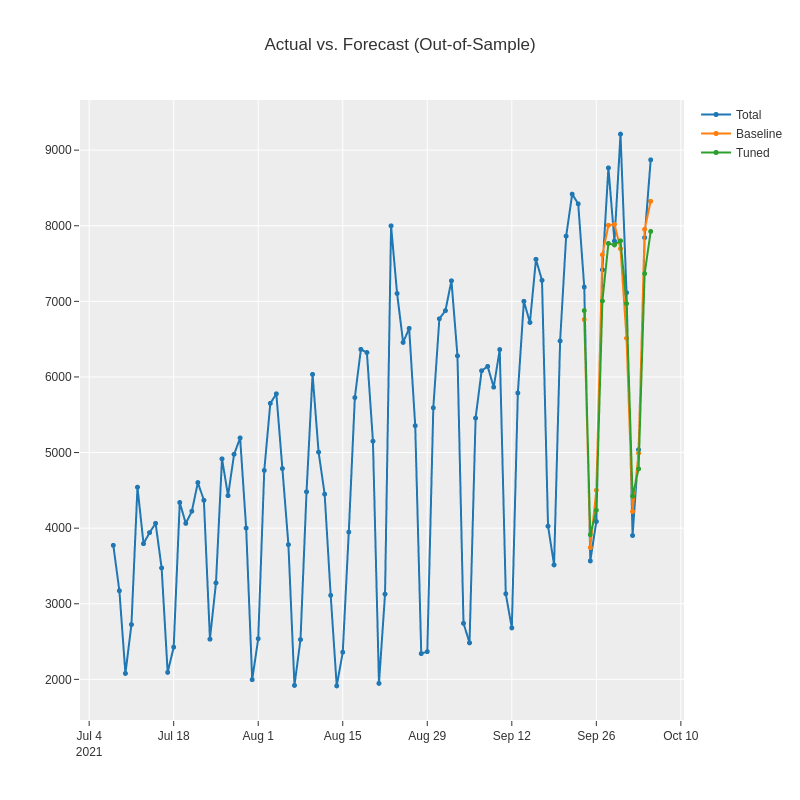

In [41]:
exp.plot_model([model, tuned_model], data_kwargs={"labels": ["Baseline", "Tuned"]})


[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging

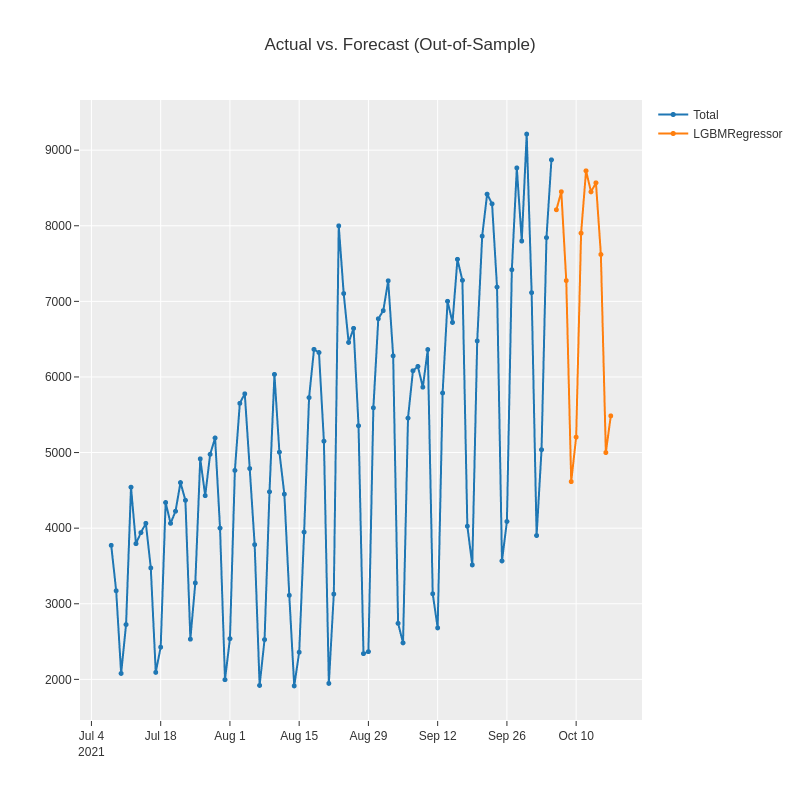

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging

,y_pred
2021-10-06,8211.6067
2021-10-07,8450.1136
2021-10-08,7274.1742
2021-10-09,4615.5602
2021-10-10,5204.0929
2021-10-11,7902.2368
2021-10-12,8726.8874
2021-10-13,8448.5339
2021-10-14,8567.8328
2021-10-15,7620.3081


In [42]:
final_model = exp.finalize_model(tuned_model)
exp.plot_model(final_model)
exp.predict_model(final_model)


In [43]:
print(tuned_model)
print(final_model)

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                        4, 3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=LGBMRegressor(bagging_freq=4, colsample_bytree=0.5,
              learning_rate=0.011608086832988466, max_depth=1,
              min_child_samples=5, n_estimators=227, n_jobs=-1, num_leaves=248,
              random_state=42, reg_alpha=0.030243982597818773,
              reg_lambda=2.7024119956576452e-05, subsample=0.5),
                    sp=7, window_length=13)
ForecastingPipeline(steps=[('forecaster',
                            TransformedTargetForecaster(steps=[('model',
                                                                BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7,
                                               

In [44]:
#Save Model

_ = exp.save_model(final_model, 'final_model')


Transformation Pipeline and Model Successfully Saved


In [45]:
#Load Model
exp_load = TSForecastingExperiment()
loaded_model = exp_load.load_model('final_model')


Transformation Pipeline and Model Successfully Loaded


In [46]:
#Match Predictions Before Save and Load
exp_load.predict_model(loaded_model)

[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging

,y_pred
2021-10-06,8211.6067
2021-10-07,8450.1136
2021-10-08,7274.1742
2021-10-09,4615.5602
2021-10-10,5204.0929
2021-10-11,7902.2368
2021-10-12,8726.8874
2021-10-13,8448.5339
2021-10-14,8567.8328
2021-10-15,7620.3081


In [47]:
# Compare best 3 baseline models
best_baseline_models = exp.compare_models(n_select=3)
best_baseline_models


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,1.2749,1.1369,732.7092,894.2025,0.1550,0.1516,0.7334,0.0667
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.3460,1.2833,737.3306,934.8335,0.1430,0.1419,0.7346,0.5300
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.3716,1.3094,740.7690,924.8984,0.1327,0.1402,0.7345,0.4267
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9459,964.8748,0.1413,0.1466,0.7146,0.4000
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.6067
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.7033
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.6400
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.4100
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.4666,1.3431,800.6078,973.4139,0.1490,0.1516,0.7104,0.7667
lightgbm_cds_dt,Light Gradient Boosting w/ Cond. Deseasonalize & Detrending,1.4680,1.3076,795.8164,936.3670,0.1531,0.1538,0.7309,0.5067


Processing:   0%|          | 0/119 [00:00<?, ?it/s]

[ThetaForecaster(sp=7),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                         4, 3, 2,
                                                                         1]},
                                                    n_jobs=1)],
                     regressor=KNeighborsRegressor(n_jobs=-1), sp=7,
                     window_length=7),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                         4, 3, 2,
                                                                         1]},
                                                    n_jobs=1)],
                     regressor=HuberRegressor(), sp=7, window_length=7)]

In [50]:

compare_metrics = exp.pull()

In [51]:
best_baseline_models = exp.compare_models(n_select=3, turbo=False)
best_baseline_models


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
theta,Theta Forecaster,1.2749,1.1369,732.7092,894.2025,0.1550,0.1516,0.7334,0.0933
knn_cds_dt,K Neighbors w/ Cond. Deseasonalize & Detrending,1.3460,1.2833,737.3306,934.8335,0.1430,0.1419,0.7346,0.7633
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,1.3716,1.3094,740.7690,924.8984,0.1327,0.1402,0.7345,0.6833
bats,BATS,1.4261,1.3457,766.0130,957.0123,0.1402,0.1506,0.7074,20.9933
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.6000
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9459,964.8748,0.1413,0.1466,0.7146,0.6233
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,1.1200
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9461,964.8752,0.1413,0.1466,0.7146,0.5767
lasso_cds_dt,Lasso w/ Cond. Deseasonalize & Detrending,1.4299,1.3469,777.9457,964.8746,0.1413,0.1466,0.7146,0.6333
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.4666,1.3431,800.6078,973.4139,0.1490,0.1516,0.7104,1.8767


Processing:   0%|          | 0/131 [00:00<?, ?it/s]

[ThetaForecaster(sp=7),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                         4, 3, 2,
                                                                         1]},
                                                    n_jobs=1)],
                     regressor=KNeighborsRegressor(n_jobs=-1), sp=7,
                     window_length=7),
 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [7, 6, 5,
                                                                         4, 3, 2,
                                                                         1]},
                                                    n_jobs=1)],
                     regressor=HuberRegressor(), sp=7, window_length=7)]

In [52]:
#Blend Best Models
top_model_metrics = compare_metrics.iloc[0:3]['MAE']
display(top_model_metrics)

top_model_weights = 1-top_model_metrics/top_model_metrics.sum()
display(top_model_weights)

,MAE
theta,732.7092
knn_cds_dt,737.3306
huber_cds_dt,740.769


,MAE
theta,0.668579
knn_cds_dt,0.666488
huber_cds_dt,0.664933


In [53]:
blender = exp.blend_models(best_baseline_models, method='mean', weights=top_model_weights.values.tolist())


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2021-08-18,1.6281,1.8272,744.9985,1016.1961,0.1456,0.1506,0.7381
1,2021-08-30,0.8712,0.7703,562.3048,745.8935,0.1094,0.1085,0.7859
2,2021-09-11,1.0576,0.8140,656.0810,741.4661,0.1196,0.1179,0.8368
Mean,NaT,1.1856,1.1371,654.4614,834.5186,0.1249,0.1257,0.7869
SD,NaT,0.3220,0.4883,74.5932,128.4782,0.0152,0.0180,0.0403


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,EnsembleForecaster,0.6772,0.6152,447.7795,566.0994,0.0646,0.0668,0.9163


               y_pred
2021-09-24  7113.1000
2021-09-25  3891.3178
2021-09-26  4035.2366
2021-09-27  7045.7369
2021-09-28  7752.9316
2021-09-29  7999.9699
2021-09-30  8224.3286
2021-10-01  7175.4633
2021-10-02  4101.0365
2021-10-03  4342.1218
2021-10-04  7315.4573
2021-10-05  8007.5204


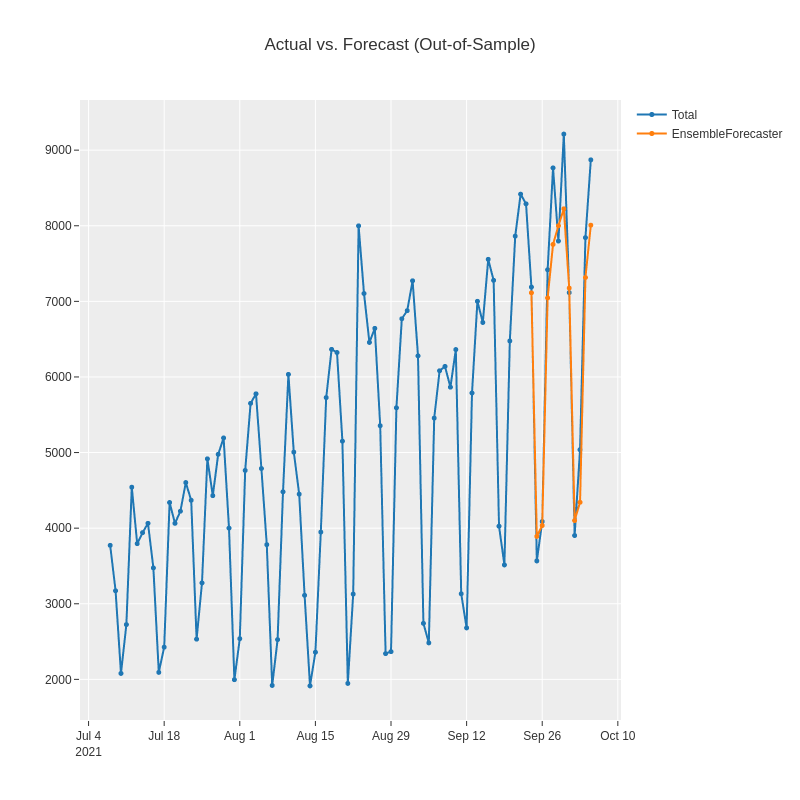

In [54]:
data_predict = exp.predict_model(blender)
print(data_predict)
exp.plot_model(estimator=blender)


               y_pred
2021-10-06  8831.4404
2021-10-07  8856.8913
2021-10-08  7306.1958
2021-10-09  4128.9573
2021-10-10  4847.3920
2021-10-11  8039.8181
2021-10-12  8914.8067
2021-10-13  9038.7450
2021-10-14  8965.4630
2021-10-15  7459.0276
2021-10-16  4416.7240
2021-10-17  5082.4713


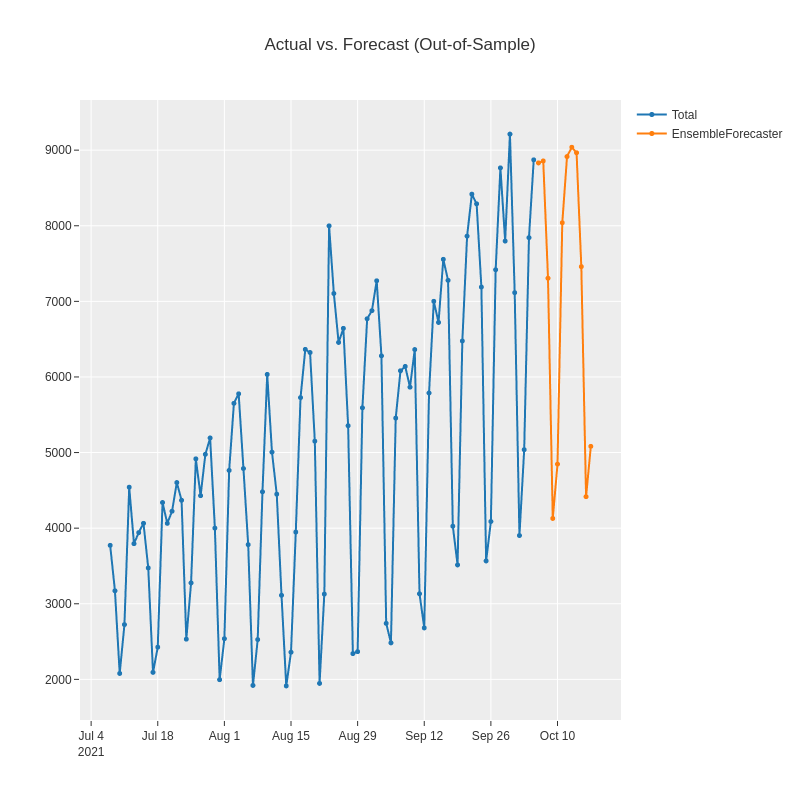

In [55]:
final_model = exp.finalize_model(blender)
print(exp.predict_model(final_model))
exp.plot_model(final_model)


In [56]:
_ = exp.save_model(final_model, 'final_model')


Transformation Pipeline and Model Successfully Saved


In [57]:
loaded_exp = TSForecastingExperiment()
loaded_model = loaded_exp.load_model('final_model')
loaded_exp.predict_model(loaded_model)


Transformation Pipeline and Model Successfully Loaded


,y_pred
2021-10-06,8831.4404
2021-10-07,8856.8913
2021-10-08,7306.1958
2021-10-09,4128.9573
2021-10-10,4847.3920
2021-10-11,8039.8181
2021-10-12,8914.8067
2021-10-13,9038.7450
2021-10-14,8965.4630
2021-10-15,7459.0276
